<br>

<span style="font-size:2em;font-weight:bold">Telco Customer Churn Analysis</span>

In this exercise, we'll be creating a simple [Flask application](http://dachurn.herokuapp.com/) using Telco Customer Churn dataset retrieved from [IBM Cognos Analytic](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113). Full data glossary can be accessed [here](https://github.com/ttnsy/dac-telco#dataset).

This notebook contains guidances & tasks on the data processing for the application.

<span style="font-size:1.5em;font-weight:bold">Libraries & Setup</span>:

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load & Pre-process data

Let's begin by reading our dataset in. The data will be using is `telcochurn.csv` which located under `data/` directory:

In [3]:
telco = pd.read_csv('data/telcochurn.csv')
telco.head()

,customer_id,city,gender,senior_citizen,dependents,tenure_months,phone_service,internet_service,contract,monthly_charges,total_charges,churn_label,cltv
0,3668-QPYBK,Los Angeles,Male,No,No,2,Single Line,DSL,Month-to-month,53.85,108.15,Yes,3239
1,9237-HQITU,Los Angeles,Female,No,Yes,2,Single Line,Fiber optic,Month-to-month,70.70,151.65,Yes,2701
2,9305-CDSKC,Los Angeles,Female,No,Yes,8,Multiple Lines,Fiber optic,Month-to-month,99.65,820.50,Yes,5372
3,7892-POOKP,Los Angeles,Female,No,Yes,28,Multiple Lines,Fiber optic,Month-to-month,104.80,3046.05,Yes,5003
4,0280-XJGEX,Los Angeles,Male,No,Yes,49,Multiple Lines,Fiber optic,Month-to-month,103.70,5036.30,Yes,5340


A very common step on your exploratory process is to make sure that all your columns have stored in the right data types. In the following cell, use `dtypes` to acquire information of data type of each column:

In [4]:
## Your code here
telco.dtypes

customer_id          object
city                 object
gender               object
senior_citizen       object
dependents           object
tenure_months         int64
phone_service        object
internet_service     object
contract             object
monthly_charges     float64
total_charges       float64
churn_label          object
cltv                  int64
dtype: object

Notice that all categorical informations from the data were stored as `object` rather than `category`.

## Adjust Data Types

**Task 1**: Fill in the blank (`___`) part of the code below to cast all `object` to `category`:

In [24]:
catcol = telco.select_dtypes('object').columns
telco[catcol] = telco[catcol].apply(lambda x: x.astype('category'))

Index(['customer_id', 'city', 'gender', 'senior_citizen', 'dependents',
       'phone_service', 'internet_service', 'contract', 'churn_label'],
      dtype='object')

In [8]:
## Categorize Tenure

The `tenure_months` column indicates the total amount of months that the customer has been with the company by the end of the quarter. Your next task is to create a new column named `tenure_group` which categorize the tenure months by the following conditions:
- **< 1 Year**: 12 tenure months and below
- **1-2 Year**: More than 12 tenure months up until 24
- **2-4 Year**: More than 24 tenure months up until 48
- **4-5 Year**: More than 48 tenure months up until 60
- **\> 5 Year**: More than 60 tenure months

**Task 2**: Fill in the blank (`___`) part to create the `tenure_group` column!

SyntaxError: invalid syntax (<ipython-input-8-9dd07dd2ada2>, line 3)

In [17]:
# Tenure Months to grouping categories
def grouping_tenure(telco) :
    if telco["tenure_months"] <= 12 :
        return "< 1 Year"
    elif (telco["tenure_months"] > 12) & (telco["tenure_months"] <= 24 ):
        return "1-2 Year"
    elif (telco["tenure_months"] > 24) & (telco["tenure_months"] <= 48) :
        return "2-4 Year"
    elif (telco["tenure_months"] > 48) & (telco["tenure_months"] <= 60) :
        return "4-5 Year"
    else:
        return "> 5 Year"

telco["tenure_group"] = telco.apply(lambda telco: grouping_tenure(telco), axis = 1) 

# Adjust category order
tenure_group = ["< 1 Year", "1-2 Year", "2-4 Year", "4-5 Year", "> 5 Year"]
telco["tenure_group"] = pd.Categorical(telco["tenure_group"], categories = tenure_group, ordered=True)

In [18]:
telco

,customer_id,city,gender,senior_citizen,dependents,tenure_months,phone_service,internet_service,contract,monthly_charges,total_charges,churn_label,cltv,tenure_group
0,3668-QPYBK,Los Angeles,Male,No,No,2,Single Line,DSL,Month-to-month,53.85,108.15,Yes,3239,< 1 Year
1,9237-HQITU,Los Angeles,Female,No,Yes,2,Single Line,Fiber optic,Month-to-month,70.70,151.65,Yes,2701,< 1 Year
2,9305-CDSKC,Los Angeles,Female,No,Yes,8,Multiple Lines,Fiber optic,Month-to-month,99.65,820.50,Yes,5372,< 1 Year
3,7892-POOKP,Los Angeles,Female,No,Yes,28,Multiple Lines,Fiber optic,Month-to-month,104.80,3046.05,Yes,5003,2-4 Year
4,0280-XJGEX,Los Angeles,Male,No,Yes,49,Multiple Lines,Fiber optic,Month-to-month,103.70,5036.30,Yes,5340,4-5 Year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Landers,Female,No,No,72,Single Line,No,Two year,21.15,1419.40,No,5306,> 5 Year
7039,6840-RESVB,Adelanto,Male,No,Yes,24,Multiple Lines,DSL,One year,84.80,1990.50,No,2140,1-2 Year
7040,2234-XADUH,Amboy,Female,No,Yes,72,Multiple Lines,Fiber optic,One year,103.20,7362.90,No,5560,> 5 Year
7041,4801-JZAZL,Angelus Oaks,Female,No,Yes,11,No,DSL,Month-to-month,29.60,346.45,No,2793,< 1 Year


## Wrap as Function

Lastly, let's wrap the whole process above as a function named `load_telco()`. This process is essential because in your Flask application later, you will need to define all your data processing as specific functions. 

**Task 3**: Fill in the blank (`___`) part with the same process you have done previously to complete the function.

In [25]:
def load_telco():
    # Read data
    telco = pd.read_csv('data/telcochurn.csv')
    
    # Adjust dtypes
    catcol = telco.select_dtypes('object').columns
    telco[catcol] = telco[catcol].apply(lambda x: x.astype('category'))
    
    # Tenure Months to grouping categories
    def grouping_tenure(telco) :
        if telco["tenure_months"] <= 12 :
            return "< 1 Year"
        elif (telco["tenure_months"] > 12) & (telco["tenure_months"] <= 24 ):
            return "1-2 Year"
        elif (telco["tenure_months"] > 24) & (telco["tenure_months"] <= 48) :
            return "2-4 Year"
        elif (telco["tenure_months"] > 48) & (telco["tenure_months"] <= 60) :
            return "4-5 Year"
        else:
            return "> 5 Year"
        
    telco["tenure_group"] = telco.apply(lambda telco: grouping_tenure(telco), axis = 1)
    
    # Adjust category order
    tenure_group = ["< 1 Year", "1-2 Year", "2-4 Year", "4-5 Year", "> 5 Year"]
    telco["tenure_group"] = pd.Categorical(telco["tenure_group"], categories = tenure_group, ordered=True)
    
    return(telco)

In [27]:
load_telco()

,customer_id,city,gender,senior_citizen,dependents,tenure_months,phone_service,internet_service,contract,monthly_charges,total_charges,churn_label,cltv,tenure_group
0,3668-QPYBK,Los Angeles,Male,No,No,2,Single Line,DSL,Month-to-month,53.85,108.15,Yes,3239,< 1 Year
1,9237-HQITU,Los Angeles,Female,No,Yes,2,Single Line,Fiber optic,Month-to-month,70.70,151.65,Yes,2701,< 1 Year
2,9305-CDSKC,Los Angeles,Female,No,Yes,8,Multiple Lines,Fiber optic,Month-to-month,99.65,820.50,Yes,5372,< 1 Year
3,7892-POOKP,Los Angeles,Female,No,Yes,28,Multiple Lines,Fiber optic,Month-to-month,104.80,3046.05,Yes,5003,2-4 Year
4,0280-XJGEX,Los Angeles,Male,No,Yes,49,Multiple Lines,Fiber optic,Month-to-month,103.70,5036.30,Yes,5340,4-5 Year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Landers,Female,No,No,72,Single Line,No,Two year,21.15,1419.40,No,5306,> 5 Year
7039,6840-RESVB,Adelanto,Male,No,Yes,24,Multiple Lines,DSL,One year,84.80,1990.50,No,2140,1-2 Year
7040,2234-XADUH,Amboy,Female,No,Yes,72,Multiple Lines,Fiber optic,One year,103.20,7362.90,No,5560,> 5 Year
7041,4801-JZAZL,Angelus Oaks,Female,No,Yes,11,No,DSL,Month-to-month,29.60,346.45,No,2793,< 1 Year


Congratulations, you have done the very first challenge of this capstone project!

If you take a look at the project directory, you will find two separate scripts; `app.py` and `helper.py`. `app.py` handles the routing and within `helper.py` you would define function to be called in `app`.

If you open up the `helper.py`, you will find all the functions needed to create the dashboard contents such as plots and data values. You may now copy the `load_telco()` function definition above and overwrite the existing function on the script and save it.

In `app.py`, notice that there's a line of `data = load_telco()`. that you've save your function in separate python file/script, you can import the function to another script as the following:

In [5]:
from helper import load_telco

data = load_telco()
data.head()

,customer_id,city,gender,senior_citizen,dependents,tenure_months,phone_service,internet_service,contract,monthly_charges,total_charges,churn_label,cltv,tenure_group
0,3668-QPYBK,Los Angeles,Male,No,No,2,Single Line,DSL,Month-to-month,53.85,108.15,Yes,3239,< 1 Year
1,9237-HQITU,Los Angeles,Female,No,Yes,2,Single Line,Fiber optic,Month-to-month,70.70,151.65,Yes,2701,< 1 Year
2,9305-CDSKC,Los Angeles,Female,No,Yes,8,Multiple Lines,Fiber optic,Month-to-month,99.65,820.50,Yes,5372,< 1 Year
3,7892-POOKP,Los Angeles,Female,No,Yes,28,Multiple Lines,Fiber optic,Month-to-month,104.80,3046.05,Yes,5003,2-4 Year
4,0280-XJGEX,Los Angeles,Male,No,Yes,49,Multiple Lines,Fiber optic,Month-to-month,103.70,5036.30,Yes,5340,4-5 Year


<span style="font-size:2em;font-weight:bold">Data Wrangling & Visualization</span>

Now that you're data is ready, we're now ready to prepare the explanatory data in our dashboard!

Within `app.py` you will see the `index()` function will return a rendered templates along with some variables:
- `card_data`: quick summary including **Customer Churn Rate**, **Retaining Customer** & **Average Lifetime Value**
- `plot_tenure_churn`: **Churn Rate by Tenure Group** plot in **Customer Tenure** tab
- `plot_tenure_cltv`: **Average Lifetime Value by Tenure** plot in **Customer Tenure** tab
- `plot_phone`: **Phone Service Customer** plot in **Subscription Service** tab
- `plot_internet`: **Internet Service Customer** plot in **Subscription Service** tab

The values and plots above were resulted from all EDA techniques you have learned in the pervious workshops. Your next challenge is to recall how to use pandas subsetting method, aggregation tables and simple visualization!


# Extract Quick Summary

Let's acquire the needed information for the quick summary in `card_data`. There are 3 values you need to extract:
- **Customer Churn Rate**: The percentage of churn customers (`churn_label` = Yes in `churn_label`)  
- **Retaining Customer**: The percentage of retaining customers (`churn_label` = No in `churn_label`)  
- **Average Lifetime Value**: Average customer lifetime value (`cltv`)

## Churn & Retaining Percentage
**Task 4**: Fill in the blank (`___`) part of the code below to create a proportion table of Churn & Retaining customer!

In [33]:
table = pd.crosstab(
    data['churn_label'],
    columns = 'percent',
    normalize = True
)*100

table

col_0,percent
churn_label,
No,73.463013
Yes,26.536987


We can extract the value from our table by using `.loc[]` subsetting method. 

**Task 5**: Fill in the blank (`___`) part to extract the information of churned customer!

In [36]:
percent_churn = table.loc['Yes', 'percent'].round(2)

f'{percent_churn}%'

'26.54%'

**Task 6**: Use the same method as above to also extract the information of retaining customer!

In [37]:
percent_retain = table.loc['No', 'percent'].round(2)

f'{percent_retain}%'

'73.46%'

## Average Lifetime Value

**Task 7**: The average lifetime value stored the average (`mean`) value of `cltv` variable. Extract the value on the cell code below!

In [50]:
## Your code here
altv = int(data['cltv'].mean())
altv

4400

<span style="font-size:1.5em;font-weight:bold">Update the application scripts!</span>

Lastly, follow these instructions to complete the next part of your application scripts:
- **On helper.py:**
    - Use the code in **Task 4** to complete `table_churn()` function in helper.


- **On app.py:**
    - Add table_churn function when importing from helper.<br> (To import multiple functions, you can simply use comma such as: `from helper import load_telco, table_churn`)
    - "Uncomment" the codes under `# generate value for cards` section then use the code in **Task 5** & **Task 6** to complete the blank (`___`) part of the line
    - Lastly, in `render_template()` at the end of `index()` in `app.py`, change `card_data=None` to `card_data=card_data`

# Generate Plot

## Subscription Service

The "Subscription Service" tab contains explanatory analysis on the proportion of churned-retained customers in each phone and internet service. There are two plots you need to recreate for this tab; **Phone Service Customer** and **Internet Service Customer**

### Phone Service Customer

The Phone Service Customer plot compares the frequency proportion of churned and retained customers in each service of the phone subscription.

If you use `data['phone_service'].unique()`, you'll find that apparently there are two phone services offered by the company; `Single Line` and `Multiple Lines`while `No` means the particular customer is not subscribed to the company's phone service.

In [51]:
## Your code here
data['phone_service'].unique()

[Single Line, Multiple Lines, No]
Categories (3, object): [Single Line, Multiple Lines, No]

**Task 8**:  
Use `pd.crosstab()` to get the frequency proportion, then recall how to use `.plot(kind = 'barh')` to create a horizontal bar plot. You can also enhance the visualization such as adjusting the color by add the color parameter to your plot function call `.plot(kind = 'bar',color=['#53a4b1','#c34454'])`.

For now, **do not mind the plot's customization** as you can copy-and-paste the codes defined under the `plot_phone()` function in `helper.py`.

In [6]:
## Your code here
phonesrv = pd.crosstab(
    data['phone_service'], data['churn_label'], normalize=True
)*100

phonesrv

churn_label,No,Yes
phone_service,,
Multiple Lines,30.115008,12.068721
No,7.269629,2.413744
Single Line,36.078376,12.054522


Text(0.5, 1.0, 'Phone Service Customer')

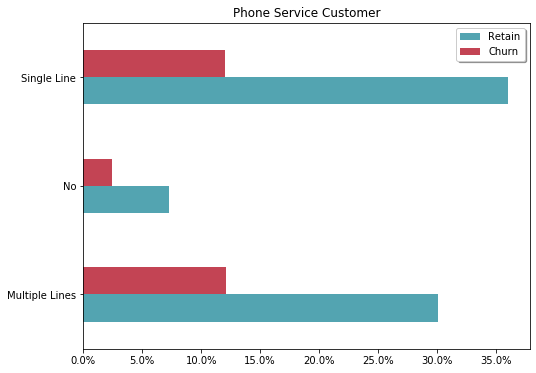

In [71]:
# Plot configuration
ax = phonesrv.plot(kind = 'barh', color=['#53a4b1','#c34454'], figsize = (8,6))

ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(['Retain', 'Churn'],fancybox=True,shadow=True)
plt.axes().get_yaxis().set_label_text('')
plt.title('Phone Service Customer')

### Internet Service Customer

**Task 9**:  
Using the same steps as what you did on "Phone Service Customer" plot, except this time the plot should compare  the frequency proportion of churned and retained customers in each service of the internet subscription!

Text(0.5, 1.0, 'Internet Service Customer')

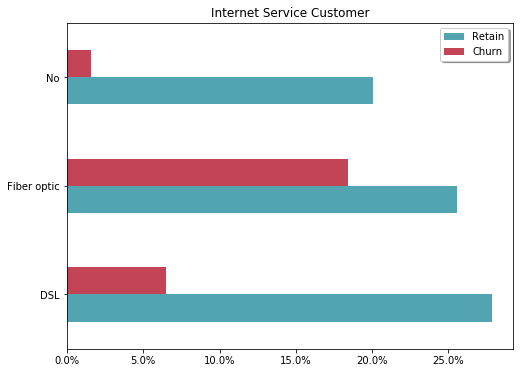

In [84]:
## Your code here
isp = pd.crosstab(
    data['internet_service'], data['churn_label'], normalize=True
)*100

ay = isp.plot(kind = 'barh', color=['#53a4b1','#c34454'], figsize = (8,6))

ay.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(['Retain', 'Churn'],fancybox=True,shadow=True)
plt.axes().get_yaxis().set_label_text('')
plt.title('Internet Service Customer')

In [74]:
isp

churn_label,No,Yes
internet_service,,
DSL,27.857447,6.517109
Fiber optic,25.543092,18.415448
No,20.062473,1.604430


## Customer Tenure

The "Customer Tenure" tab contains explanatory analysis on how the tenure varies in churned and retained customers. There are two plots you need to recreate for this tab; **Churn Rate by Tenure Group** and **Average Lifetime Value by Tenure**

### Churn Rate by Tenure Group

**Task 10**:  
The Churn Rate by Tenure Group plot compares the frequency proportion of churned and retained customers in each tenure group.

You can start by create the frequency table for the visualization. Since we'll separate the bars by the `churn_label`, you'll have to create a data frame that has the `tenure_group` as row index and the values (Yes & No) of `churn label` as column.

In [77]:
## Your code here
task10 = (pd.crosstab(data['tenure_group'], data['churn_label'], normalize=True)*100).round(2)

task10

churn_label,No,Yes
tenure_group,,
< 1 Year,16.31,14.72
1-2 Year,10.36,4.17
2-4 Year,18.02,4.61
4-5 Year,10.11,1.70
> 5 Year,18.66,1.32


Text(0.5, 1.0, 'Churn Rate by Tenure Group')

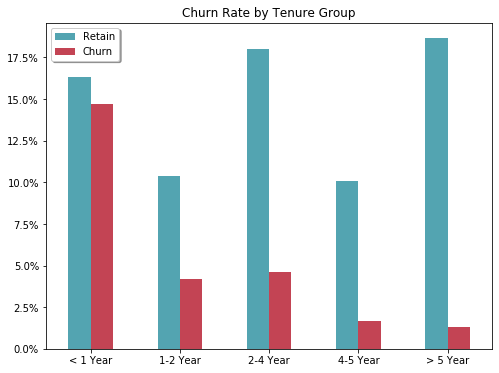

In [78]:
ax = task10.plot(kind = 'bar', color=['#53a4b1','#c34454'], figsize=(8, 6))

# Plot Configuration
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.axes().get_xaxis().set_label_text('')
plt.xticks(rotation = 360)
plt.legend(['Retain', 'Churn'],fancybox=True,shadow=True)
plt.title('Churn Rate by Tenure Group')

Once your data is ready, recall how to use `.plot(kind = 'bar')` to create a bar plot. You can also enhance the visualization such as adjusting the color by add the color parameter to your plot function call `.plot(kind = 'bar',color=['#53a4b1','#c34454'])`.

Again, **do not mind the plot's customization** as you can copy-and-paste the codes defined under the `plot_tenure_churn()` function in `helper.py`. 

### Average LTV by Tenure

**Task 11**:  
The last plot you need to recreate is the Average Lifetime Value by Tenure plot. This plot visualize how the average customer life time value varies in each tenure month, both in retained and churned customers. 

Let's start by aggregating our data. Since we want to plot two lines; one line of churned customer and the other for the retained customer, we need to create a dataframe that has the `tenure_months` as row index and the average (`mean`) `cltv` values of both No & Yes `churn_label` in columns as below:

In [41]:


a = pd.pivot_table(data, values='cltv', index=['tenure_months'], columns=['churn_label'])

b = pd.crosstab(data['tenure_months'], [data['churn_label']], values=data['cltv'], aggfunc='mean')

b

churn_label,No,Yes
tenure_months,,
0,3665.545455,NaN
1,3993.549356,4049.110526
2,4300.539130,4013.398374
3,4042.216981,3915.904255
4,3888.387097,4196.975904
...,...,...
68,5185.494505,5120.888889
69,5187.862069,5133.375000
70,5155.962963,5327.818182


In [16]:
## Your code here


cltv             
churn_label             No          Yes
tenure_months                          
0              3665.545455          NaN
1              3993.549356  4049.110526
2              4300.539130  4013.398374
3              4042.216981  3915.904255
4              3888.387097  4196.975904
...                    ...          ...
68             5185.494505  5120.888889
69             5187.862069  5133.375000
70             5155.962963  5327.818182
71             5154.500000  4859.000000
72             5248.632022  4975.166667

[73 rows x 2 columns]

Once your data is ready, recall how to use `.plot(kind = 'line')` to create a line plot. You can also enhance the visualization such as adjusting the color by add the color parameter to your plot function call `.plot(kind = 'bar',color=['#333333','#b3b3b3'])`.

Once again, **do not mind the plot's customization** as you can copy-and-paste the codes defined under the `plot_tenure_cltv()` function in `helper.py`. 

Text(0.5, 1.0, 'Average Lifetime Value by Tenure')

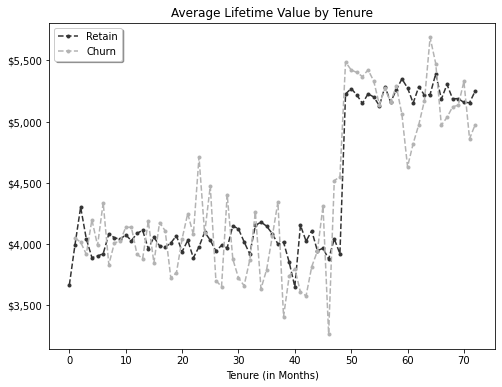

In [42]:
ax = b.plot(color=['#333333','#b3b3b3'], figsize=(8, 6),style = '.--')

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.axes().get_xaxis().set_label_text('Tenure (in Months)')
plt.xticks(rotation = 360)
plt.legend(['Retain', 'Churn'],fancybox=True,shadow=True)
plt.title('Average Lifetime Value by Tenure')

Text(0.5, 1.0, 'Average Lifetime Value by Tenure')

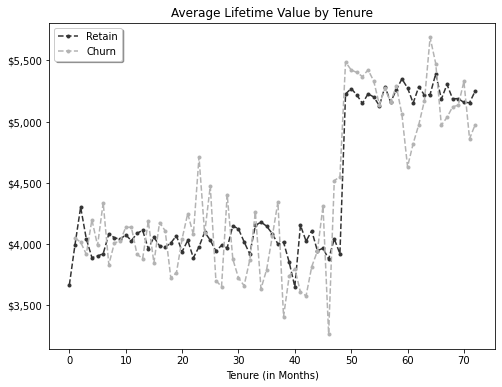

In [51]:
ax = ______.plot(color=['#333333','#b3b3b3'], figsize=(8, 6),style = '.--')

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.axes().get_xaxis().set_label_text('Tenure (in Months)')
plt.xticks(rotation = 360)
plt.legend(['Retain', 'Churn'],fancybox=True,shadow=True)
plt.title('Average Lifetime Value by Tenure')

<span style="font-size:1.5em;font-weight:bold">Update the application scripts!</span>

Now that your plots are ready, it's time to move them to the dashboard!

- **On helper.py**:
    - Use the code on **Task 8-11** to complete the functions below:
        - Task 8 --> `plot_phone()`
        - Task 9 --> `plot_internet()`
        - Task 10 --> `plot_tenure_churn()`
        - Task 11 --> `plot_tenure_cltv()`
        
- **On app.py:**
    - Now that all the functions are completed, you can call all functions from helper.py using the asterisk (\*) symbol: `from helper import *` 
    - "Uncomment" the codes under `# generate plot` section to generate the plots
    - Lastly, in `render_template()` at the end of `index()` in `app.py`, uncomment the remaining codes.

# Create-Your-Own Analysis

We have prepared a Create-Your-Own tab on the apps where you can play around with the data frame and come up with your own analysis perspective. Don't forget to do the following steps:

- Pass a variable onto the `render_template()` from `index()`
- Create a separate function on `helper.py` for data wrangling and preprocessing, either returning a dataframe, simple value, or a plot to keep the `app.py` as clean as possible and easy to debug at later times
- Edit the `index.html` to make sure it display your intended output on the page. You can copy-and-paste the skeleton from the other plots or values

In [44]:
## Your code here
data.head()

,customer_id,city,gender,senior_citizen,dependents,tenure_months,phone_service,internet_service,contract,monthly_charges,total_charges,churn_label,cltv,tenure_group
0,3668-QPYBK,Los Angeles,Male,No,No,2,Single Line,DSL,Month-to-month,53.85,108.15,Yes,3239,< 1 Year
1,9237-HQITU,Los Angeles,Female,No,Yes,2,Single Line,Fiber optic,Month-to-month,70.70,151.65,Yes,2701,< 1 Year
2,9305-CDSKC,Los Angeles,Female,No,Yes,8,Multiple Lines,Fiber optic,Month-to-month,99.65,820.50,Yes,5372,< 1 Year
3,7892-POOKP,Los Angeles,Female,No,Yes,28,Multiple Lines,Fiber optic,Month-to-month,104.80,3046.05,Yes,5003,2-4 Year
4,0280-XJGEX,Los Angeles,Male,No,Yes,49,Multiple Lines,Fiber optic,Month-to-month,103.70,5036.30,Yes,5340,4-5 Year


In [138]:
b = pd.crosstab(data['tenure_months'], [data['internet_service']], values=data['monthly_charges'], aggfunc='mean', normalize=False).iloc[:,0:2]

b

internet_service,DSL,Fiber optic
tenure_months,,
0,64.940000,NaN
1,44.210613,77.587660
2,47.750610,80.333028
3,47.184507,82.874444
4,48.245902,82.864935
...,...,...
68,69.295122,99.553659
69,65.653333,101.427381
70,71.436538,104.905319


In [177]:
c = pd.crosstab(data['tenure_months'], [data['phone_service'], data['churn_label']], values=data['monthly_charges'], aggfunc='mean', normalize=False).loc[:,['Single Line']]

c = pd.crosstab(data['tenure_months'], [data['phone_service'], data['churn_label']], values=data['monthly_charges'], aggfunc='mean', normalize=False).loc[:,['Multiple Lines']]

d = pd.crosstab(data['tenure_months'], [data['internet_service'], data['churn_label']], values=data['monthly_charges'], aggfunc='mean', normalize=False).loc[:,['DSL']]

c = pd.crosstab(data['tenure_months'], [data['internet_service'], data['churn_label']], values=data['monthly_charges'], aggfunc='mean', normalize=False).loc[:,['Fiber optic']]

d

internet_service        DSL           
churn_label              No        Yes
tenure_months                         
0                 64.940000        NaN
1                 45.244624  43.402521
2                 49.408974  46.246512
3                 49.829487  43.960938
4                 48.629167  47.694000
...                     ...        ...
68                69.132500  75.800000
69                65.206897  78.600000
70                72.083000  55.275000
71                76.570492  49.350000
72                76.930153  73.325000

[73 rows x 2 columns]

In [108]:
p = (pd.crosstab(data['tenure_group'], [data['internet_service']], values=data['monthly_charges'], aggfunc='mean', normalize=False))

p

internet_service,DSL,Fiber optic,No
tenure_group,,,
< 1 Year,48.440000,82.176002,20.372904
1-2 Year,54.930060,87.782294,20.749372
2-4 Year,58.662157,92.807958,21.102226
4-5 Year,62.572281,96.969689,21.334472
> 5 Year,71.486183,103.021895,22.500543


Text(0.5, 1.0, 'Internet Service ARPU')

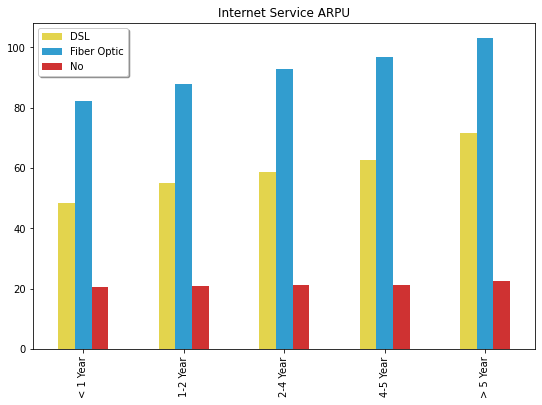

In [109]:


az = p.plot(kind = 'bar', color=['#e3d44d','#329dcf','#cf3232'], figsize = (9,6))

plt.legend(['DSL', 'Fiber Optic', 'No'],fancybox=True,shadow=True)
plt.axes().get_yaxis().set_label_text('')
plt.axes().get_xaxis().set_label_text('')
plt.title('Internet Service ARPU')

Text(0.5, 1.0, 'Average Retail Pricing Unit (ARPU) by Tenure Internet DSL')

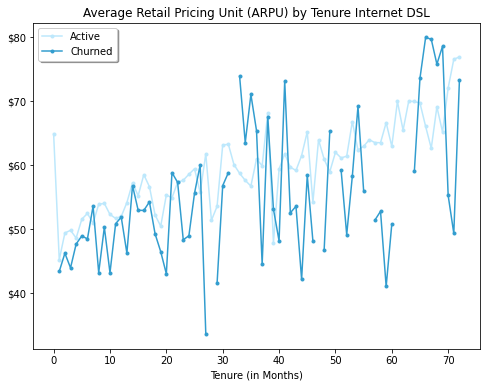

In [181]:
an = d.plot(color=['#bde8fc', '#329dcf'], figsize=(8, 6),style = '.-')

an.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))
plt.axes().get_xaxis().set_label_text('Tenure (in Months)')
plt.xticks(rotation = 360)
plt.legend(['Active', 'Churned'],fancybox=True,shadow=True)
plt.title('Average Retail Pricing Unit (ARPU) by Tenure Internet DSL')